In [1]:
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [2]:
a = pd.read_csv('accepted.csv')
a.head(3)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,246

In [3]:
a.shape

(2260701, 151)

In [4]:
#1. Remove all obserations with No Funded Amount First, How many:
print(len(a[a.funded_amnt.isnull()]))

33


In [5]:
drop = a[a.funded_amnt.isnull()].index
a.drop(drop, axis=0, inplace=True)
a.shape

(2260668, 151)

In [6]:
#No more NaN funded amounts: 
a[a.funded_amnt.isna()].shape

(0, 151)

In [7]:
#2. How many value types for "loan_status"?
print(a.loan_status.value_counts(dropna=False).sum()) #Total matches

a.loan_status.value_counts(dropna=False)

2260668


Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [8]:
#Create new column and map Charged Off = 0, Fully Paid = 1
a['loan_status_bin'] = a['loan_status'].map({'Charged Off':0, 'Fully Paid':1})

In [9]:
#Quick Check:
a[['loan_status', 'loan_status_bin']].sample(10)

,loan_status,loan_status_bin
962089,Current,NaN
451652,Current,NaN
28762,Fully Paid,1.0
1829797,Charged Off,0.0
22621,Fully Paid,1.0
2188441,Charged Off,0.0
1707452,Current,NaN
1960082,Fully Paid,1.0
888953,Late (31-120 days),NaN
468681,Fully Paid,1.0


In [10]:
#Drop all loans which do not classify as "Fully Paid" or "Charged Off":
drop2 = a[a.loan_status_bin.isnull()].index
a.drop(drop2, axis=0, inplace=True)
a.shape

(1345310, 152)

In [11]:
a.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_bin
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0

In [12]:
#3. Taking all loans with interest rate greater than or equal to 20%: 
a = a[a.int_rate >= 20].reset_index(drop=True)
a.shape

(110144, 152)

In [13]:
#4. Check breakdown by grade type and and Keep ALL:
a.grade.value_counts()

E    55735
F    31483
D    13824
G     9102
Name: grade, dtype: int64

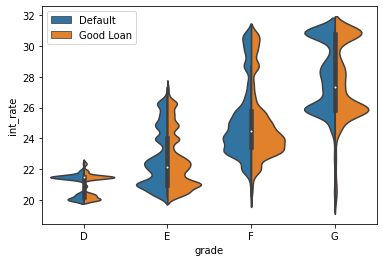

In [14]:
g = sns.violinplot(data=a, y='int_rate', x='grade', split=True, hue='loan_status_bin',
               order=['D', 'E', 'F', 'G'])

g.legend(handles=g.legend_.legendHandles, labels=['Default', 'Good Loan']);

In [15]:
a[['grade', 'loan_status_bin']].groupby(['grade']).describe()

loan_status_bin                                             
                count      mean       std  min  25%  50%  75%  max
grade                                                             
D             13824.0  0.669560  0.470389  0.0  0.0  1.0  1.0  1.0
E             55735.0  0.617673  0.485960  0.0  0.0  1.0  1.0  1.0
F             31483.0  0.544643  0.498011  0.0  0.0  1.0  1.0  1.0
G              9102.0  0.500000  0.500027  0.0  0.0  0.5  1.0  1.0

In [16]:
#a = a[(a.grade=='D')]
#a.shape

In [17]:
#4b. Check Loan Amount vs Defaults.....Loans less than 10,000 do significantly better! 74% 

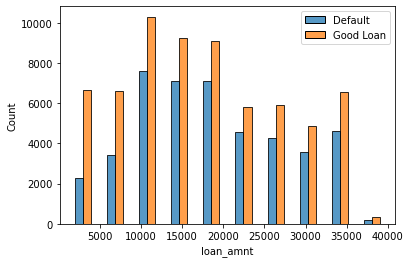

In [18]:
g = sns.histplot(data=a, x='loan_amnt', hue='loan_status_bin', multiple='dodge', bins=10, shrink=0.5)

g.legend(handles=g.legend_.legendHandles, labels=['Default', 'Good Loan']);

In [19]:
a[['loan_amnt', 'loan_status_bin']].describe()

,loan_amnt,loan_status_bin
count,110144.000000,110144.000000
mean,18156.971101,0.593587
std,9541.689177,0.491166
min,1000.000000,0.000000
25%,10800.000000,0.000000
50%,17125.000000,1.000000
75%,25000.000000,1.000000
max,40000.000000,1.000000


In [20]:
#Adjust loan amount? Try 9,000? Slight improvement....
a[a.loan_amnt<9000][['loan_amnt', 'loan_status_bin']].describe()

,loan_amnt,loan_status_bin
count,19259.000000,19259.000000
mean,5004.394050,0.697596
std,2146.340477,0.459311
min,1000.000000,0.000000
25%,3200.000000,0.000000
50%,5000.000000,1.000000
75%,6900.000000,1.000000
max,8975.000000,1.000000


In [21]:
a = a[a.loan_amnt < 9000]
a.shape

(19259, 152)

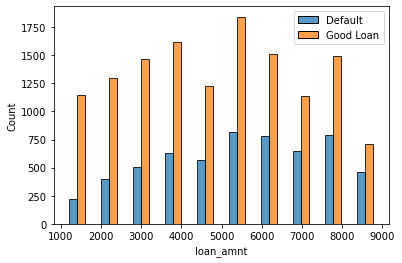

In [22]:
g = sns.histplot(data=a, x='loan_amnt', hue='loan_status_bin', multiple='dodge', bins=10, shrink=.5)

g.legend(handles=g.legend_.legendHandles, labels=['Default', 'Good Loan']);

In [23]:
a[['loan_amnt', 'loan_status_bin']].describe()

,loan_amnt,loan_status_bin
count,19259.000000,19259.000000
mean,5004.394050,0.697596
std,2146.340477,0.459311
min,1000.000000,0.000000
25%,3200.000000,0.000000
50%,5000.000000,1.000000
75%,6900.000000,1.000000
max,8975.000000,1.000000


In [24]:
#4c. Check Income Amount vs Defaults....income above 60,000 (slightly above 3Q) yields 76%

In [25]:
a[['annual_inc', 'loan_status_bin']].describe()

,annual_inc,loan_status_bin
count,1.925900e+04,19259.000000
mean,5.040472e+04,0.697596
std,5.923210e+04,0.459311
min,0.000000e+00,0.000000
25%,2.848150e+04,0.000000
50%,4.200000e+04,1.000000
75%,6.200000e+04,1.000000
max,4.680804e+06,1.000000


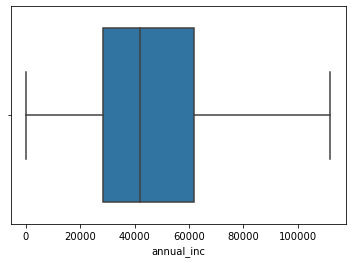

In [26]:
sns.boxplot(data=a, x='annual_inc', showfliers=False);

In [27]:
a = a[a.annual_inc > 60000]
a[['loan_status_bin']].describe()

,loan_status_bin
count,4920.000000
mean,0.766463
std,0.423124
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [28]:
## Keep verification....see what happens: 

#5. Drop all observations where income is not verified: 

a['verification_status'].value_counts()

Source Verified    1921
Verified           1778
Not Verified       1221
Name: verification_status, dtype: int64

In [29]:
#a = a[a['verification_status']!='Not Verified'].reset_index(drop=True)
a.shape

(4920, 152)

In [30]:
#4. Drop member_id (all NaN), funded_amnt, funded_amnt_inv. Keep loan_amnt (we know that before investment): 
a.drop(['member_id', 'funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)
a.shape

(4920, 149)

In [31]:
#5. Remove all columns related to "hardship" status. We won't know this at get go. 

a.drop(['hardship_flag', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount',
        'hardship_loan_status', 'hardship_dpd', 'hardship_end_date', 'hardship_start_date',
        'hardship_amount', 'hardship_status', 'hardship_reason', 'hardship_type', 
        'hardship_length'], axis=1, inplace=True)
a.shape

(4920, 137)

In [32]:
#6. Remove 'Policy Code' Column. All Policy Codes here are '1'. 
a.policy_code.value_counts()

1.0    4920
Name: policy_code, dtype: int64

In [33]:
a.drop(['policy_code'], axis=1, inplace=True)
a.shape

(4920, 136)

In [34]:
#7. Remove all observations with "Joint Applications". 
a.application_type.value_counts()

Individual    4788
Joint App      132
Name: application_type, dtype: int64

In [35]:
a = a[a.application_type == 'Individual']
a.shape

(4788, 136)

In [36]:
#8. Remove all info regarding second applicant or "Joint Applications".

In [37]:
a.drop(['sec_app_mths_since_last_major_derog', 'sec_app_collections_12_mths_ex_med',
        'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il',
        'sec_app_revol_util', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc',
        'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_low',
        'dti_joint', 'sec_app_fico_range_high', 'verification_status_joint', 'revol_bal_joint', 
        'annual_inc_joint'], axis=1, inplace=True)

a.shape

(4788, 120)

In [38]:
#9. Remove 'next_pymnt_d' because all loans are "Paid Off" or "Defaulted", so they are all "NaN"
a.next_pymnt_d.isna().sum()

4788

In [39]:
a.drop(['next_pymnt_d'], axis=1, inplace=True)
a.shape

(4788, 119)

In [40]:
#10. Drop 'url'. It will not provide any info. 
a.drop(['url'], axis=1, inplace=True)
a.shape

(4788, 118)

In [41]:
#11. Drop 'zip_code'. It's not even complete. Can always use addr_state if location is a factor. 
a.drop(['zip_code'], axis=1, inplace=True)
a.shape

(4788, 117)

In [42]:
#12. "out_prncp" and "out_prncp_inv" are 0 because there is no more "outstanding" amounts. Drop them. 
print(a.out_prncp.value_counts())
print(a.out_prncp_inv.value_counts())

0.0    4788
Name: out_prncp, dtype: int64
0.0    4788
Name: out_prncp_inv, dtype: int64


In [43]:
a.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)
a.shape

(4788, 115)

In [44]:
#13. Remove 'id' (irrevelvant) but keep 'issue_d' for feature engineering.
a.drop(['id'], axis=1, inplace=True)
a.shape

(4788, 114)

In [45]:
#14. Drop 'pymnt_plan'. They are all 'n'. 
a.pymnt_plan.value_counts()

n    4788
Name: pymnt_plan, dtype: int64

In [46]:
a.drop(['pymnt_plan'], axis=1, inplace=True)
a.shape

(4788, 113)

In [47]:
#15. Drop 'last_fico_range_high' and 'last_fico_range_low'. We only rely on initial fico scores. 
a.drop(['last_fico_range_high', 'last_fico_range_low'], axis=1, inplace=True)
a.shape

(4788, 111)

In [48]:
#16. Taking all loans with interest rate greater than or equal to 20%: 
a = a[a.int_rate >= 20].reset_index(drop=True)
a.shape

(4788, 111)

In [49]:
#Partial Set of Features, Work in Progress......

In [50]:
#16. Let's rearrange order of columns to enhance our view: 
sub = a[['issue_d', 'loan_amnt', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
   'term', 'int_rate', 'installment', 'initial_list_status',
   'grade', 'sub_grade', 'emp_length', 'home_ownership',
   'earliest_cr_line', 'open_acc', 'total_acc',
   'revol_bal', 'revol_util',
   'inq_last_6mths',
   
   'delinq_2yrs', 'mths_since_last_delinq','acc_now_delinq',
   'collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal',
   'pub_rec', 'mths_since_last_record',
   
   
   'purpose', 'title', 'addr_state', 'loan_status', 
   'loan_status_bin', 
   'application_type',
   'verification_status','emp_title',
   'total_pymnt', 'total_pymnt_inv',
   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
   'recoveries', 'collection_recovery_fee',
   'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 
   'desc']]

sub.head(2)

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,mths_since_last_record,purpose,title,addr_state,loan_status,loan_status_bin,application_type,verification_status,emp_title,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,desc
0,Dec-2015,8775.0,75000.0,20.37,660.0,664.0,36 months,22.45,337.17,w,F,F1,10+ years,RENT,Sep-2006,14.0,44.0,7613.0,33.4,4.0,0.0,60.0,0.0,0.0,328.0,65963.0,1.0,65.0,credit_card,Credit card refinancing,GA,Fully Paid,1.0,Individual,Source Verified,Service Rep,9369.55,9369.55,8775.00,594.55,0.0,0.0,0.0,Apr-2016,8717.1,Mar-2019,NaN
1,Dec-2015,3850.0,88000.0,6.23,715.0,719.0,36 months,21.48,146.00,w,E,E5,4 years,RENT,Mar-2007,8.0,11.0,23.0,0.5,3.0,1.0,13.0,0.0,0.0,0.0,9511.0,0.0,NaN,home_improvement,Home improvement,NY,Charged Off,0.0,Individual,Source Verified,Project Manager,1171.51,1171.51,655.19,501.32,15.0,0.0,0.0,Sep-2016,146.0,Mar-2019,NaN


In [51]:
sub.shape

(4788, 47)

In [52]:
sub.isna().mean().sort_values()

issue_d                       0.000000
acc_now_delinq                0.000000
pub_rec                       0.000000
purpose                       0.000000
addr_state                    0.000000
loan_status                   0.000000
loan_status_bin               0.000000
application_type              0.000000
delinq_2yrs                   0.000000
verification_status           0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
total_pymnt                   0.000000
inq_last_6mths                0.000000
collections_12_mths_ex_med    0.000000
revol_bal                     0.000000
loan_amnt                     0.000000
annual_inc                    0.000000
dti                           0.000000
fico_range_low                0.000000
fico_range_high          

In [53]:
#Carve out features from 'sub' which you think are most important:

imp_sub = sub[['issue_d', 'loan_amnt', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
   'term', 'int_rate', 'installment', 'initial_list_status',
   'grade', 'sub_grade', 'emp_length', 'home_ownership',
   'earliest_cr_line', 'open_acc', 'total_acc',
   'revol_bal', 'revol_util',
   'inq_last_6mths', 'verification_status',
   
   'delinq_2yrs', 'mths_since_last_delinq','acc_now_delinq',
   'collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal',
   'pub_rec', 'mths_since_last_record',
   
   
   'purpose', 'title', 'loan_status', 
   'loan_status_bin']] 

In [54]:
imp_sub.shape

(4788, 33)

In [55]:
imp_sub.head(2)

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,mths_since_last_record,purpose,title,loan_status,loan_status_bin
0,Dec-2015,8775.0,75000.0,20.37,660.0,664.0,36 months,22.45,337.17,w,F,F1,10+ years,RENT,Sep-2006,14.0,44.0,7613.0,33.4,4.0,Source Verified,0.0,60.0,0.0,0.0,328.0,65963.0,1.0,65.0,credit_card,Credit card refinancing,Fully Paid,1.0
1,Dec-2015,3850.0,88000.0,6.23,715.0,719.0,36 months,21.48,146.00,w,E,E5,4 years,RENT,Mar-2007,8.0,11.0,23.0,0.5,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,9511.0,0.0,NaN,home_improvement,Home improvement,Charged Off,0.0


In [56]:
imp_sub.isna().sum().sort_values()

issue_d                          0
purpose                          0
pub_rec                          0
collections_12_mths_ex_med       0
acc_now_delinq                   0
delinq_2yrs                      0
verification_status              0
inq_last_6mths                   0
revol_bal                        0
loan_status                      0
open_acc                         0
earliest_cr_line                 0
home_ownership                   0
total_acc                        0
sub_grade                        0
loan_amnt                        0
annual_inc                       0
dti                              0
fico_range_high                  0
term                             0
fico_range_low                   0
installment                      0
initial_list_status              0
grade                            0
int_rate                         0
loan_status_bin                  0
revol_util                      12
title                           31
tot_coll_amt        

In [57]:
#Let's add emp_length to the mix. Impute NaN with "None" string for time being: 

In [58]:
imp_sub['emp_length'].isna().sum()

137

In [59]:
imp_sub['emp_length'].replace(np.nan, "None", inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [60]:
imp_sub['emp_length'].isna().sum()

0

In [61]:
imp_sub.isna().sum().sort_values()

issue_d                          0
purpose                          0
pub_rec                          0
collections_12_mths_ex_med       0
acc_now_delinq                   0
delinq_2yrs                      0
verification_status              0
inq_last_6mths                   0
revol_bal                        0
loan_status                      0
open_acc                         0
earliest_cr_line                 0
home_ownership                   0
total_acc                        0
sub_grade                        0
loan_amnt                        0
annual_inc                       0
dti                              0
emp_length                       0
fico_range_high                  0
fico_range_low                   0
int_rate                         0
installment                      0
initial_list_status              0
grade                            0
term                             0
loan_status_bin                  0
revol_util                      12
title               

In [62]:
#Let's take a closer look at "mths_since_last_delinq":
imp_sub.mths_since_last_delinq.value_counts(dropna=False)

NaN     1813
12.0      83
10.0      74
19.0      72
20.0      68
9.0       68
7.0       63
6.0       62
14.0      61
18.0      61
23.0      60
21.0      57
5.0       57
16.0      56
13.0      56
22.0      56
26.0      55
17.0      54
11.0      53
28.0      53
33.0      53
24.0      52
8.0       51
27.0      51
31.0      50
4.0       50
35.0      50
15.0      49
45.0      47
29.0      45
3.0       45
25.0      43
34.0      41
43.0      41
40.0      40
32.0      40
44.0      40
30.0      39
38.0      38
48.0      37
2.0       36
37.0      36
47.0      36
36.0      36
39.0      36
46.0      31
42.0      31
68.0      30
41.0      28
52.0      27
53.0      27
49.0      27
55.0      24
69.0      24
56.0      24
67.0      22
79.0      21
80.0      20
73.0      20
50.0      19
63.0      19
62.0      18
54.0      18
59.0      17
60.0      17
72.0      17
51.0      17
76.0      17
65.0      17
64.0      16
57.0      16
71.0      15
74.0      15
77.0      15
58.0      14
66.0      14
1.0       13

In [63]:
imp_sub[imp_sub.mths_since_last_delinq.isna()][['loan_status_bin']].describe()

,loan_status_bin
count,1813.000000
mean,0.755102
std,0.430145
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [64]:
#Because 75% of all NaN values for "last_delinq" have been paid off, lets impute with "0". 
imp_sub['mths_since_last_delinq'] = imp_sub['mths_since_last_delinq'].replace(np.nan, 0)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_1802/762310108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_sub['mths_since_last_delinq'] = imp_sub['mths_since_last_delinq'].replace(np.nan, 0)


In [65]:
imp_sub.isna().sum().sort_values()

issue_d                          0
purpose                          0
pub_rec                          0
collections_12_mths_ex_med       0
acc_now_delinq                   0
mths_since_last_delinq           0
delinq_2yrs                      0
verification_status              0
inq_last_6mths                   0
revol_bal                        0
loan_status                      0
open_acc                         0
earliest_cr_line                 0
total_acc                        0
emp_length                       0
loan_amnt                        0
annual_inc                       0
dti                              0
home_ownership                   0
fico_range_high                  0
term                             0
fico_range_low                   0
installment                      0
initial_list_status              0
grade                            0
sub_grade                        0
int_rate                         0
loan_status_bin                  0
revol_util          

In [66]:
#For the time being, drop all other features with NAs....we don't know which ones are important.
#We also don't know what is the best way to "impute".
No_NA = imp_sub.dropna(axis=1)
No_NA

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin
0,Dec-2015,8775.0,75000.0,20.37,660.0,664.0,36 months,22.45,337.17,w,F,F1,10+ years,RENT,Sep-2006,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0
1,Dec-2015,3850.0,88000.0,6.23,715.0,719.0,36 months,21.48,146.00,w,E,E5,4 years,RENT,Mar-2007,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0
2,Dec-2015,3225.0,65000.0,14.18,680.0,684.0,36 months,24.24,126.94,w,F,F3,< 1 year,MORTGAGE,Jan-1999,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0
3,Dec-2015,5800.0,90000.0,17.49,665.0,669.0,36 months,21.48,219.95,w,E,E5,4 years,MORTGAGE,Aug-2003,11.0,32.0,7476.0,5.0,Source Verified,4.0,0.0,0.0,0.0,1.0,small_business,Fully Paid,1.0
4,Dec-2015,8975.0,67000.0,21.53,755.0,759.0,36 months,21.48,340.35,w,E,E5,3 years,OWN,Jul-2009,6.0,23.0,0.0,3.0,Source Verified,0.0,0.0,0.0,0.0,0.0,moving,Fully Paid,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,Oct-2016,6400.0,85008.0,9.10,660.0,664.0,36 months,21.49,242.74,w,D,D5,2 years,MORTGAGE,Oct-2003,6.0,22.0,9068.0,1.0,Source Verified,0.0,38.0,0.0,0.0,0.0,other,Charged Off,0.0
4784,Oct-2016,4300.0,68000.0,1.50,685.0,689.0,36 months,25.69,172.55,f,F,F1,8 years,RENT,Oct-2006,11.0,15.0,1380.0,0.0,Verified,1.0,17.0,0.0,0.0,0.0,other,Charged Off,0.0
4785,Oct-2016,7000.0,150000.0,1.00,695.0,699.0,36 months,24.99,278.29,f,E,E4,None,OWN,Sep-2005,5.0,10.0,12269.0,0.0,Verified,0.0,48.0,0.0,0.0,0.0,home_improvement,Fully Paid,1.0
4786,Oct-2016,8000.0,72500.0,21.01,690.0,694.0,36 months,23.99,313.83,f,E,E2,4 years,MORTGAGE,Dec-1993,9.0,14.0,24928.0,1.0,Verified,0.0,72.0,0.0,0.0,0.0,other,Fully Paid,1.0


In [67]:
#We now have 31 features (includes target as well)
No_NA.shape

(4788, 28)

In [68]:
#Cross check that dataframe in use has no more Null values:
No_NA.isna().sum().sum()

0

In [69]:
data = No_NA.copy()

In [70]:
#Data Types of Remaining Features: 
data.dtypes

issue_d                        object
loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
term                           object
int_rate                      float64
installment                   float64
initial_list_status            object
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
earliest_cr_line               object
open_acc                      float64
total_acc                     float64
revol_bal                     float64
inq_last_6mths                float64
verification_status            object
delinq_2yrs                   float64
mths_since_last_delinq        float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
pub_rec                       float64
purpose                        object
loan_status 

In [71]:
#Return unique values of categorical columns:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'issue_d': ['Dec-2015',
  'Nov-2015',
  'Oct-2015',
  'Sep-2015',
  'Aug-2015',
  'Jul-2015',
  'Jun-2015',
  'May-2015',
  'Apr-2015',
  'Mar-2015',
  'Feb-2015',
  'Jan-2015',
  'Mar-2018',
  'Feb-2018',
  'Jan-2018',
  'Sep-2017',
  'Aug-2017',
  'Jul-2017',
  'Jun-2016',
  'May-2016',
  'Apr-2016',
  'Sep-2018',
  'Aug-2018',
  'Jul-2018',
  'Jun-2017',
  'May-2017',
  'Apr-2017',
  'Mar-2016',
  'Feb-2016',
  'Jan-2016',
  'Dec-2014',
  'Nov-2014',
  'Oct-2014',
  'Sep-2014',
  'Aug-2014',
  'Jul-2014',
  'Jun-2014',
  'May-2014',
  'Apr-2014',
  'Mar-2014',
  'Feb-2014',
  'Jan-2014',
  'Dec-2018',
  'Nov-2018',
  'Oct-2018',
  'Jun-2018',
  'May-2018',
  'Apr-2018',
  'Dec-2011',
  'Nov-2011',
  'Oct-2011',
  'Sep-2011',
  'Aug-2011',
  'Jun-2011',
  'May-2011',
  'Feb-2011',
  'Jan-2011',
  'Dec-2010',
  'Mar-2017',
  'Feb-2017',
  'Jan-2017',
  'Dec-2013',
  'Nov-2013',
  'Oct-2013',
  'Sep-2013',
  'Aug-2013',
  'Jul-2013',
  'Jun-2013',
  'May-2013',
  'Apr-2013',
  'Mar-20

In [72]:
#A. Working with Date Columns First: 

In [73]:
date_columns = ['issue_d', 'earliest_cr_line']

In [74]:
data[date_columns]

,issue_d,earliest_cr_line
0,Dec-2015,Sep-2006
1,Dec-2015,Mar-2007
2,Dec-2015,Jan-1999
3,Dec-2015,Aug-2003
4,Dec-2015,Jul-2009
...,...,...
4783,Oct-2016,Oct-2003
4784,Oct-2016,Oct-2006
4785,Oct-2016,Sep-2005
4786,Oct-2016,Dec-1993


In [75]:
data.loc[0, 'earliest_cr_line'][0:3]

'Sep'

In [76]:
data.loc[0, 'earliest_cr_line'][-4:]

'2006'

In [77]:
for column in date_columns:
    data[column + '_month'] = data[column].apply(lambda x: x[0:3])
    data[column + '_year'] = data[column].apply(lambda x: x[-4:])

In [78]:
data

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,Dec-2015,8775.0,75000.0,20.37,660.0,664.0,36 months,22.45,337.17,w,F,F1,10+ years,RENT,Sep-2006,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0,Dec,2015,Sep,2006
1,Dec-2015,3850.0,88000.0,6.23,715.0,719.0,36 months,21.48,146.00,w,E,E5,4 years,RENT,Mar-2007,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0,Dec,2015,Mar,2007
2,Dec-2015,3225.0,65000.0,14.18,680.0,684.0,36 months,24.24,126.94,w,F,F3,< 1 year,MORTGAGE,Jan-1999,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,Dec,2015,Jan,1999
3,Dec-2015,5800.0,90000.0,17.49,665.0,669.0,36 months,21.48,219.95,w,E,E5,4 years,MORTGAGE,Aug-2003,11.0,32.0,7476.0,5.0,Source Verified,4.0,0.0,0.0,0.0,1.0,small_business,Fully Paid,1.0,Dec,2015,Aug,2003
4,Dec-2015,8975.0,67000.0,21.53,755.0,759.0,36 months,21.48,340.35,w,E,E5,3 years,OWN,Jul-2009,6.0,23.0,0.0,3.0,Source Verified,0.0,0.0,0.0,0.0,0.0,moving,Fully Paid,1.0,Dec,2015,Jul,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,Oct-2016,6400.0,85008.0,9.10,660.0,664.0,36 months,21.49,242.74,w,D,D5,2 years,MORTGAGE,Oct-2003,6.0,22.0,9068.0,1.0,Source Verified,0.0,38.0,0.0,0.0,0.0,other,Charged Off,0.0,Oct,2016,Oct,2003
4784,Oct-2016,4300.0,68000.0,1.50,685.0,689.0,36 months,25.69,172.55,f,F,F1,8 years,RENT,Oct-2006,11.0,15.0,1380.0,0.0,Verified,1.0,17.0,0.0,0.0,0.0,other,Charged Off,0.0,Oct,2016,Oct,2006
4785,Oct-2016,7000.0,150000.0,1.00,695.0,699.0,36 months,24.99,278.29,f,E,E4,None,OWN,Sep-2005,5.0,10.0,12269.0,0.0,Verified,0.0,48.0,0.0,0.0,0.0,home_improvement,Fully Paid,1.0,Oct,2016,Sep,2005
4786,Oct-2016,8000.0,72500.0,21.01,690.0,694.0,36 months,23.99,313.83,f,E,E2,4 years,MORTGAGE,Dec-1993,9.0,14.0,24928.0,1.0,Verified,0.0,72.0,0.0,0.0,0.0,other,Fully Paid,1.0,Oct,2016,Dec,1993


In [79]:
data = data.drop(date_columns, axis=1)
data.shape

(4788, 30)

In [80]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [81]:
for column in date_columns: 
    data[column + '_month'] = data[column + '_month'].apply(lambda x: month_ordering.index(x))

In [82]:
data

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,8775.0,75000.0,20.37,660.0,664.0,36 months,22.45,337.17,w,F,F1,10+ years,RENT,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0,11,2015,8,2006
1,3850.0,88000.0,6.23,715.0,719.0,36 months,21.48,146.00,w,E,E5,4 years,RENT,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0,11,2015,2,2007
2,3225.0,65000.0,14.18,680.0,684.0,36 months,24.24,126.94,w,F,F3,< 1 year,MORTGAGE,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,11,2015,0,1999
3,5800.0,90000.0,17.49,665.0,669.0,36 months,21.48,219.95,w,E,E5,4 years,MORTGAGE,11.0,32.0,7476.0,5.0,Source Verified,4.0,0.0,0.0,0.0,1.0,small_business,Fully Paid,1.0,11,2015,7,2003
4,8975.0,67000.0,21.53,755.0,759.0,36 months,21.48,340.35,w,E,E5,3 years,OWN,6.0,23.0,0.0,3.0,Source Verified,0.0,0.0,0.0,0.0,0.0,moving,Fully Paid,1.0,11,2015,6,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,6400.0,85008.0,9.10,660.0,664.0,36 months,21.49,242.74,w,D,D5,2 years,MORTGAGE,6.0,22.0,9068.0,1.0,Source Verified,0.0,38.0,0.0,0.0,0.0,other,Charged Off,0.0,9,2016,9,2003
4784,4300.0,68000.0,1.50,685.0,689.0,36 months,25.69,172.55,f,F,F1,8 years,RENT,11.0,15.0,1380.0,0.0,Verified,1.0,17.0,0.0,0.0,0.0,other,Charged Off,0.0,9,2016,9,2006
4785,7000.0,150000.0,1.00,695.0,699.0,36 months,24.99,278.29,f,E,E4,None,OWN,5.0,10.0,12269.0,0.0,Verified,0.0,48.0,0.0,0.0,0.0,home_improvement,Fully Paid,1.0,9,2016,8,2005
4786,8000.0,72500.0,21.01,690.0,694.0,36 months,23.99,313.83,f,E,E2,4 years,MORTGAGE,9.0,14.0,24928.0,1.0,Verified,0.0,72.0,0.0,0.0,0.0,other,Fully Paid,1.0,9,2016,11,1993


In [83]:
for column in data.columns:
    try:
        data[column] = data[column].astype(np.float)
    except:
        pass

In [84]:
#Create new column of total months borrower has credit line upto loan issuance date:
data = data.assign(months_cr_line=(data['issue_d_year'] - data['earliest_cr_line_year'])*12+(data['issue_d_month']-data['earliest_cr_line_month']))            

In [85]:
data.drop(['issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year'], axis=1, inplace=True)
data.shape

(4788, 27)

In [86]:
data.head(2)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line
0,8775.0,75000.0,20.37,660.0,664.0,36 months,22.45,337.17,w,F,F1,10+ years,RENT,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0,111.0
1,3850.0,88000.0,6.23,715.0,719.0,36 months,21.48,146.00,w,E,E5,4 years,RENT,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0,105.0


In [87]:
data.dtypes

loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
term                           object
int_rate                      float64
installment                   float64
initial_list_status            object
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
open_acc                      float64
total_acc                     float64
revol_bal                     float64
inq_last_6mths                float64
verification_status            object
delinq_2yrs                   float64
mths_since_last_delinq        float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
pub_rec                       float64
purpose                        object
loan_status                    object
loan_status_bin               float64
months_cr_li

In [88]:
#Return unique values of categorical columns:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'term': [' 36 months', ' 60 months'],
 'initial_list_status': ['w', 'f'],
 'grade': ['F', 'E', 'G', 'D'],
 'sub_grade': ['F1',
  'E5',
  'F3',
  'F5',
  'G2',
  'E4',
  'G1',
  'F2',
  'G3',
  'F4',
  'E2',
  'D4',
  'E3',
  'D5',
  'E1',
  'G4',
  'G5'],
 'emp_length': ['10+ years',
  '4 years',
  '< 1 year',
  '3 years',
  '6 years',
  '5 years',
  '7 years',
  '2 years',
  'None',
  '9 years',
  '1 year',
  '8 years'],
 'home_ownership': ['RENT', 'MORTGAGE', 'OWN', 'ANY'],
 'verification_status': ['Source Verified', 'Verified', 'Not Verified'],
 'purpose': ['credit_card',
  'home_improvement',
  'debt_consolidation',
  'small_business',
  'moving',
  'other',
  'medical',
  'house',
  'car',
  'major_purchase',
  'renewable_energy',
  'vacation',
  'wedding'],
 'loan_status': ['Fully Paid', 'Charged Off']}

In [89]:
#Encoding Functions

def binary_temp(df, column, positive_value):
    temp_df = df.assign(new_be=df[column].apply(lambda x: 1 if x == positive_value else 0))
    return temp_df

def binary_encode(temp_df, column):
    new_df = temp_df.drop(column, axis=1)
    new_df = new_df.rename(columns={'new_be':column})
    return new_df
    
    #df[column + '_be'] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    #df_new = pd.concat([df, df[column].apply(lambda x: 1 if x == positive_value else 0)], axis=1)
    #df_new = df_new.drop(column, axis=1)
    #return df_new

def ordinal_temp(df, column, ordering):
    temp_df = df.assign(new_oe=df[column].apply(lambda x: ordering.index(x)))
    return temp_df

def ordinal_encode(temp_df, column):
    new_df = temp_df.drop(column, axis=1)
    new_df = new_df.rename(columns={'new_oe':column})
    return new_df

def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

In [90]:
#Check Binary Encoding:
temp = binary_temp(data, 'term', ' 60 months')

In [91]:
temp[['term', 'new_be']].sample(10)

,term,new_be
713,36 months,0
1259,36 months,0
2070,36 months,0
1444,36 months,0
3881,60 months,1
996,36 months,0
2225,36 months,0
524,36 months,0
1616,36 months,0
4513,36 months,0


In [92]:
#If ok, complete binary encoding:
new_df = binary_encode(temp, 'term')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,w,F,F1,10+ years,RENT,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0,111.0,0
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,w,E,E5,4 years,RENT,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0,105.0,0
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,w,F,F3,< 1 year,MORTGAGE,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,203.0,0
3,5800.0,90000.0,17.49,665.0,669.0,21.48,219.95,w,E,E5,4 years,MORTGAGE,11.0,32.0,7476.0,5.0,Source Verified,4.0,0.0,0.0,0.0,1.0,small_business,Fully Paid,1.0,148.0,0
4,8975.0,67000.0,21.53,755.0,759.0,21.48,340.35,w,E,E5,3 years,OWN,6.0,23.0,0.0,3.0,Source Verified,0.0,0.0,0.0,0.0,0.0,moving,Fully Paid,1.0,77.0,0


In [93]:
temp = binary_temp(new_df, 'initial_list_status', 'w')

In [94]:
temp[['initial_list_status', 'new_be']].sample(10)

,initial_list_status,new_be
2356,w,1
1966,w,1
3690,f,0
3821,f,0
1457,w,1
4761,f,0
4028,f,0
344,f,0
3180,f,0
3426,f,0


In [95]:
new_df = binary_encode(temp, 'initial_list_status')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,F,F1,10+ years,RENT,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0,111.0,0,1
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,E,E5,4 years,RENT,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0,105.0,0,1
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,F,F3,< 1 year,MORTGAGE,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,203.0,0,1
3,5800.0,90000.0,17.49,665.0,669.0,21.48,219.95,E,E5,4 years,MORTGAGE,11.0,32.0,7476.0,5.0,Source Verified,4.0,0.0,0.0,0.0,1.0,small_business,Fully Paid,1.0,148.0,0,1
4,8975.0,67000.0,21.53,755.0,759.0,21.48,340.35,E,E5,3 years,OWN,6.0,23.0,0.0,3.0,Source Verified,0.0,0.0,0.0,0.0,0.0,moving,Fully Paid,1.0,77.0,0,1


In [96]:
grade_ordering = sorted(new_df['grade'].unique())
grade_ordering

['D', 'E', 'F', 'G']

In [97]:
temp_df = ordinal_temp(new_df, 'grade', grade_ordering)
temp_df[['grade', 'new_oe']]

,grade,new_oe
0,F,2
1,E,1
2,F,2
3,E,1
4,E,1
...,...,...
4783,D,0
4784,F,2
4785,E,1
4786,E,1


In [98]:
#If ok, complete ordinal encoding:
new_df = ordinal_encode(temp_df, 'grade')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,F1,10+ years,RENT,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0,111.0,0,1,2
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,E5,4 years,RENT,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0,105.0,0,1,1
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,F3,< 1 year,MORTGAGE,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,203.0,0,1,2
3,5800.0,90000.0,17.49,665.0,669.0,21.48,219.95,E5,4 years,MORTGAGE,11.0,32.0,7476.0,5.0,Source Verified,4.0,0.0,0.0,0.0,1.0,small_business,Fully Paid,1.0,148.0,0,1,1
4,8975.0,67000.0,21.53,755.0,759.0,21.48,340.35,E5,3 years,OWN,6.0,23.0,0.0,3.0,Source Verified,0.0,0.0,0.0,0.0,0.0,moving,Fully Paid,1.0,77.0,0,1,1


In [99]:
sub_grade_ordering = sorted(new_df['sub_grade'].unique())
sub_grade_ordering

['D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [100]:
temp_df = ordinal_temp(new_df, 'sub_grade', sub_grade_ordering)
temp_df[['sub_grade', 'new_oe']]

,sub_grade,new_oe
0,F1,7
1,E5,6
2,F3,9
3,E5,6
4,E5,6
...,...,...
4783,D5,1
4784,F1,7
4785,E4,5
4786,E2,3


In [101]:
#If ok, complete ordinal encoding:
new_df = ordinal_encode(temp_df, 'sub_grade')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,10+ years,RENT,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0,111.0,0,1,2,7
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,4 years,RENT,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0,105.0,0,1,1,6
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,< 1 year,MORTGAGE,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,203.0,0,1,2,9
3,5800.0,90000.0,17.49,665.0,669.0,21.48,219.95,4 years,MORTGAGE,11.0,32.0,7476.0,5.0,Source Verified,4.0,0.0,0.0,0.0,1.0,small_business,Fully Paid,1.0,148.0,0,1,1,6
4,8975.0,67000.0,21.53,755.0,759.0,21.48,340.35,3 years,OWN,6.0,23.0,0.0,3.0,Source Verified,0.0,0.0,0.0,0.0,0.0,moving,Fully Paid,1.0,77.0,0,1,1,6


In [102]:
emp_ordering = [
    'None',
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years',
    ]

In [103]:
temp_df = ordinal_temp(new_df, 'emp_length', emp_ordering)
temp_df[['emp_length', 'new_oe']]

,emp_length,new_oe
0,10+ years,11
1,4 years,5
2,< 1 year,1
3,4 years,5
4,3 years,4
...,...,...
4783,2 years,3
4784,8 years,9
4785,None,0
4786,4 years,5


In [104]:
new_df = ordinal_encode(temp_df, 'emp_length')
new_df.head(3)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,RENT,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0,111.0,0,1,2,7,11
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,RENT,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0,105.0,0,1,1,6,5
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,MORTGAGE,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,203.0,0,1,2,9,1


In [105]:
#Dummify nominal features:
numerical_df = onehot_encode(new_df, 'home_ownership')
numerical_df

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,credit_card,Fully Paid,1.0,111.0,0,1,2,7,11,0,0,0,1
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,home_improvement,Charged Off,0.0,105.0,0,1,1,6,5,0,0,0,1
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,debt_consolidation,Charged Off,0.0,203.0,0,1,2,9,1,0,1,0,0
3,5800.0,90000.0,17.49,665.0,669.0,21.48,219.95,11.0,32.0,7476.0,5.0,Source Verified,4.0,0.0,0.0,0.0,1.0,small_business,Fully Paid,1.0,148.0,0,1,1,6,5,0,1,0,0
4,8975.0,67000.0,21.53,755.0,759.0,21.48,340.35,6.0,23.0,0.0,3.0,Source Verified,0.0,0.0,0.0,0.0,0.0,moving,Fully Paid,1.0,77.0,0,1,1,6,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,6400.0,85008.0,9.10,660.0,664.0,21.49,242.74,6.0,22.0,9068.0,1.0,Source Verified,0.0,38.0,0.0,0.0,0.0,other,Charged Off,0.0,156.0,0,1,0,1,3,0,1,0,0
4784,4300.0,68000.0,1.50,685.0,689.0,25.69,172.55,11.0,15.0,1380.0,0.0,Verified,1.0,17.0,0.0,0.0,0.0,other,Charged Off,0.0,120.0,0,0,2,7,9,0,0,0,1
4785,7000.0,150000.0,1.00,695.0,699.0,24.99,278.29,5.0,10.0,12269.0,0.0,Verified,0.0,48.0,0.0,0.0,0.0,home_improvement,Fully Paid,1.0,133.0,0,0,1,5,0,0,0,1,0
4786,8000.0,72500.0,21.01,690.0,694.0,23.99,313.83,9.0,14.0,24928.0,1.0,Verified,0.0,72.0,0.0,0.0,0.0,other,Fully Paid,1.0,274.0,0,0,1,3,5,0,1,0,0


In [106]:
numerical_df2 = onehot_encode(numerical_df, 'purpose')
numerical_df2

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,14.0,44.0,7613.0,4.0,Source Verified,0.0,60.0,0.0,0.0,1.0,Fully Paid,1.0,111.0,0,1,2,7,11,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,8.0,11.0,23.0,3.0,Source Verified,1.0,13.0,0.0,0.0,0.0,Charged Off,0.0,105.0,0,1,1,6,5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,6.0,10.0,1793.0,2.0,Source Verified,0.0,0.0,0.0,0.0,0.0,Charged Off,0.0,203.0,0,1,2,9,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5800.0,90000.0,17.49,665.0,669.0,21.48,219.95,11.0,32.0,7476.0,5.0,Source Verified,4.0,0.0,0.0,0.0,1.0,Fully Paid,1.0,148.0,0,1,1,6,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,8975.0,67000.0,21.53,755.0,759.0,21.48,340.35,6.0,23.0,0.0,3.0,Source Verified,0.0,0.0,0.0,0.0,0.0,Fully Paid,1.0,77.0,0,1,1,6,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,6400.0,85008.0,9.10,660.0,664.0,21.49,242.74,6.0,22.0,9068.0,1.0,Source Verified,0.0,38.0,0.0,0.0,0.0,Charged Off,0.0,156.0,0,1,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4784,4300.0,68000.0,1.50,685.0,689.0,25.69,172.55,11.0,15.0,1380.0,0.0,Verified,1.0,17.0,0.0,0.0,0.0,Charged Off,0.0,120.0,0,0,2,7,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4785,7000.0,150000.0,1.00,695.0,699.0,24.99,278.29,5.0,10.0,12269.0,0.0,Verified,0.0,48.0,0.0,0.0,0.0,Fully Paid,1.0,133.0,0,0,1,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4786,8000.0,72500.0,21.01,690.0,694.0,23.99,313.83,9.0,14.0,24928.0,1.0,Verified,0.0,72.0,0.0,0.0,0.0,Fully Paid,1.0,274.0,0,0,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [107]:
numerical_df3 = onehot_encode(numerical_df2, 'verification_status')
numerical_df3

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,14.0,44.0,7613.0,4.0,0.0,60.0,0.0,0.0,1.0,Fully Paid,1.0,111.0,0,1,2,7,11,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,8.0,11.0,23.0,3.0,1.0,13.0,0.0,0.0,0.0,Charged Off,0.0,105.0,0,1,1,6,5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,6.0,10.0,1793.0,2.0,0.0,0.0,0.0,0.0,0.0,Charged Off,0.0,203.0,0,1,2,9,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5800.0,90000.0,17.49,665.0,669.0,21.48,219.95,11.0,32.0,7476.0,5.0,4.0,0.0,0.0,0.0,1.0,Fully Paid,1.0,148.0,0,1,1,6,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,8975.0,67000.0,21.53,755.0,759.0,21.48,340.35,6.0,23.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,1.0,77.0,0,1,1,6,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,6400.0,85008.0,9.10,660.0,664.0,21.49,242.74,6.0,22.0,9068.0,1.0,0.0,38.0,0.0,0.0,0.0,Charged Off,0.0,156.0,0,1,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4784,4300.0,68000.0,1.50,685.0,689.0,25.69,172.55,11.0,15.0,1380.0,0.0,1.0,17.0,0.0,0.0,0.0,Charged Off,0.0,120.0,0,0,2,7,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4785,7000.0,150000.0,1.00,695.0,699.0,24.99,278.29,5.0,10.0,12269.0,0.0,0.0,48.0,0.0,0.0,0.0,Fully Paid,1.0,133.0,0,0,1,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4786,8000.0,72500.0,21.01,690.0,694.0,23.99,313.83,9.0,14.0,24928.0,1.0,0.0,72.0,0.0,0.0,0.0,Fully Paid,1.0,274.0,0,0,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [108]:
numerical_df4 = numerical_df3.drop('loan_status', axis=1)
numerical_df4

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,14.0,44.0,7613.0,4.0,0.0,60.0,0.0,0.0,1.0,1.0,111.0,0,1,2,7,11,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,8.0,11.0,23.0,3.0,1.0,13.0,0.0,0.0,0.0,0.0,105.0,0,1,1,6,5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,6.0,10.0,1793.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0,1,2,9,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5800.0,90000.0,17.49,665.0,669.0,21.48,219.95,11.0,32.0,7476.0,5.0,4.0,0.0,0.0,0.0,1.0,1.0,148.0,0,1,1,6,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,8975.0,67000.0,21.53,755.0,759.0,21.48,340.35,6.0,23.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,77.0,0,1,1,6,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,6400.0,85008.0,9.10,660.0,664.0,21.49,242.74,6.0,22.0,9068.0,1.0,0.0,38.0,0.0,0.0,0.0,0.0,156.0,0,1,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4784,4300.0,68000.0,1.50,685.0,689.0,25.69,172.55,11.0,15.0,1380.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,120.0,0,0,2,7,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4785,7000.0,150000.0,1.00,695.0,699.0,24.99,278.29,5.0,10.0,12269.0,0.0,0.0,48.0,0.0,0.0,0.0,1.0,133.0,0,0,1,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4786,8000.0,72500.0,21.01,690.0,694.0,23.99,313.83,9.0,14.0,24928.0,1.0,0.0,72.0,0.0,0.0,0.0,1.0,274.0,0,0,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [109]:
numerical_df4.dtypes

loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
int_rate                      float64
installment                   float64
open_acc                      float64
total_acc                     float64
revol_bal                     float64
inq_last_6mths                float64
delinq_2yrs                   float64
mths_since_last_delinq        float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
pub_rec                       float64
loan_status_bin               float64
months_cr_line                float64
term                            int64
initial_list_status             int64
grade                           int64
sub_grade                       int64
emp_length                      int64
ANY                             uint8
MORTGAGE                        uint8
OWN                             uint8
RENT        

In [110]:
#Don't Drop the Grade Column!! they are all types now!

#numerical_df4 = numerical_df4.drop('grade', axis=1)

In [111]:
numerical_df4.shape

(4788, 43)

In [112]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [113]:
X = numerical_df4.drop('loan_status_bin', axis=1)
y = numerical_df4['loan_status_bin']

In [114]:
X

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,8775.0,75000.0,20.37,660.0,664.0,22.45,337.17,14.0,44.0,7613.0,4.0,0.0,60.0,0.0,0.0,1.0,111.0,0,1,2,7,11,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3850.0,88000.0,6.23,715.0,719.0,21.48,146.00,8.0,11.0,23.0,3.0,1.0,13.0,0.0,0.0,0.0,105.0,0,1,1,6,5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,3225.0,65000.0,14.18,680.0,684.0,24.24,126.94,6.0,10.0,1793.0,2.0,0.0,0.0,0.0,0.0,0.0,203.0,0,1,2,9,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5800.0,90000.0,17.49,665.0,669.0,21.48,219.95,11.0,32.0,7476.0,5.0,4.0,0.0,0.0,0.0,1.0,148.0,0,1,1,6,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,8975.0,67000.0,21.53,755.0,759.0,21.48,340.35,6.0,23.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,77.0,0,1,1,6,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,6400.0,85008.0,9.10,660.0,664.0,21.49,242.74,6.0,22.0,9068.0,1.0,0.0,38.0,0.0,0.0,0.0,156.0,0,1,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4784,4300.0,68000.0,1.50,685.0,689.0,25.69,172.55,11.0,15.0,1380.0,0.0,1.0,17.0,0.0,0.0,0.0,120.0,0,0,2,7,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4785,7000.0,150000.0,1.00,695.0,699.0,24.99,278.29,5.0,10.0,12269.0,0.0,0.0,48.0,0.0,0.0,0.0,133.0,0,0,1,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4786,8000.0,72500.0,21.01,690.0,694.0,23.99,313.83,9.0,14.0,24928.0,1.0,0.0,72.0,0.0,0.0,0.0,274.0,0,0,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [115]:
y

0       1.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
4783    0.0
4784    0.0
4785    1.0
4786    1.0
4787    1.0
Name: loan_status_bin, Length: 4788, dtype: float64

In [116]:
X_scaled = sc.fit_transform(X)

In [117]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,1.738898,-0.182527,0.400638,-0.972492,-0.972492,-0.163114,1.762586,0.419585,1.498572,-0.314370,2.025625,-0.449462,1.815617,-0.076696,-0.151385,1.017895,-0.901444,-0.227696,1.412222,1.395096,0.923513,0.991772,-0.032332,-0.914655,-0.349428,1.140534,-0.125291,4.004890,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922
1,-0.584556,-0.058123,-1.179441,1.937525,1.937525,-0.577803,-0.584252,-0.595731,-1.066401,-0.687793,1.256559,0.436874,-0.285566,-0.076696,-0.151385,-0.405909,-0.972438,-0.227696,1.412222,0.013276,0.599644,-0.597631,-0.032332,-0.914655,-0.349428,1.140534,-0.125291,-0.249695,-0.763077,3.386554,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922
2,-0.879411,-0.278223,-0.291066,0.085696,0.085696,0.602136,-0.818236,-0.934170,-1.144127,-0.600710,0.487493,-0.449462,-0.866744,-0.076696,-0.151385,-0.405909,0.187142,-0.227696,1.412222,1.395096,1.571250,-1.657233,-0.032332,1.093308,-0.349428,-0.876783,-0.125291,-0.249695,1.310483,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922
3,0.335390,-0.038984,0.078811,-0.707945,-0.707945,-0.577803,0.323572,-0.088073,0.565854,-0.321111,2.794691,3.095885,-0.866744,-0.076696,-0.151385,1.017895,-0.463643,-0.227696,1.412222,0.013276,0.599644,-0.597631,-0.032332,1.093308,-0.349428,-0.876783,-0.125291,-0.249695,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,4.482467,-0.184125,-0.088249,-0.572848,1.254117,-0.756922
4,1.833252,-0.259084,0.530262,4.053900,4.053900,-0.577803,1.801624,-0.934170,-0.133684,-0.688924,1.256559,-0.449462,-0.866744,-0.076696,-0.151385,-0.405909,-1.303747,-0.227696,1.412222,0.013276,0.599644,-0.862531,-0.032332,-0.914655,2.861821,-0.876783,-0.125291,-0.249695,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,4.567605,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,0.618451,-0.086755,-0.858732,-0.972492,-0.972492,-0.573528,0.603346,-0.934170,-0.211410,-0.242785,-0.281573,-0.449462,0.832085,-0.076696,-0.151385,-0.405909,-0.368983,-0.227696,1.412222,-1.368545,-1.019699,-1.127432,-0.032332,1.093308,-0.349428,-0.876783,-0.125291,-0.249695,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,1.791949,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922
4784,-0.372261,-0.249514,-1.707996,0.350243,0.350243,1.222032,-0.258319,-0.088073,-0.755495,-0.621029,-1.050639,0.436874,-0.106742,-0.076696,-0.151385,-0.405909,-0.794952,-0.227696,-0.708104,1.395096,0.923513,0.461971,-0.032332,-0.914655,-0.349428,1.140534,-0.125291,-0.249695,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,1.791949,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,-0.797374,1.321141
4785,0.901511,0.535191,-1.763869,0.879337,0.879337,0.922772,1.039764,-1.103389,-1.144127,-0.085299,-1.050639,-0.449462,1.279145,-0.076696,-0.151385,-0.405909,-0.641130,-0.227696,-0.708104,0.013276,0.275775,-1.922133,-0.032332,-0.914655,2.861821,-0.876783,-0.125291,-0.249695,-0.763077,3.386554,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,-0.797374,1.321141
4786,1.373279,-0.206451,0.472155,0.614790,0.614790,0.495258,1.47

In [118]:
scaled = pd.concat([X,y], axis=1)
scaled

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,loan_status_bin
0,1.738898,-0.182527,0.400638,-0.972492,-0.972492,-0.163114,1.762586,0.419585,1.498572,-0.314370,2.025625,-0.449462,1.815617,-0.076696,-0.151385,1.017895,-0.901444,-0.227696,1.412222,1.395096,0.923513,0.991772,-0.032332,-0.914655,-0.349428,1.140534,-0.125291,4.004890,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922,1.0
1,-0.584556,-0.058123,-1.179441,1.937525,1.937525,-0.577803,-0.584252,-0.595731,-1.066401,-0.687793,1.256559,0.436874,-0.285566,-0.076696,-0.151385,-0.405909,-0.972438,-0.227696,1.412222,0.013276,0.599644,-0.597631,-0.032332,-0.914655,-0.349428,1.140534,-0.125291,-0.249695,-0.763077,3.386554,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922,0.0
2,-0.879411,-0.278223,-0.291066,0.085696,0.085696,0.602136,-0.818236,-0.934170,-1.144127,-0.600710,0.487493,-0.449462,-0.866744,-0.076696,-0.151385,-0.405909,0.187142,-0.227696,1.412222,1.395096,1.571250,-1.657233,-0.032332,1.093308,-0.349428,-0.876783,-0.125291,-0.249695,1.310483,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922,0.0
3,0.335390,-0.038984,0.078811,-0.707945,-0.707945,-0.577803,0.323572,-0.088073,0.565854,-0.321111,2.794691,3.095885,-0.866744,-0.076696,-0.151385,1.017895,-0.463643,-0.227696,1.412222,0.013276,0.599644,-0.597631,-0.032332,1.093308,-0.349428,-0.876783,-0.125291,-0.249695,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,4.482467,-0.184125,-0.088249,-0.572848,1.254117,-0.756922,1.0
4,1.833252,-0.259084,0.530262,4.053900,4.053900,-0.577803,1.801624,-0.934170,-0.133684,-0.688924,1.256559,-0.449462,-0.866744,-0.076696,-0.151385,-0.405909,-1.303747,-0.227696,1.412222,0.013276,0.599644,-0.862531,-0.032332,-0.914655,2.861821,-0.876783,-0.125291,-0.249695,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,4.567605,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,0.618451,-0.086755,-0.858732,-0.972492,-0.972492,-0.573528,0.603346,-0.934170,-0.211410,-0.242785,-0.281573,-0.449462,0.832085,-0.076696,-0.151385,-0.405909,-0.368983,-0.227696,1.412222,-1.368545,-1.019699,-1.127432,-0.032332,1.093308,-0.349428,-0.876783,-0.125291,-0.249695,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,1.791949,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,1.254117,-0.756922,0.0
4784,-0.372261,-0.249514,-1.707996,0.350243,0.350243,1.222032,-0.258319,-0.088073,-0.755495,-0.621029,-1.050639,0.436874,-0.106742,-0.076696,-0.151385,-0.405909,-0.794952,-0.227696,-0.708104,1.395096,0.923513,0.461971,-0.032332,-0.914655,-0.349428,1.140534,-0.125291,-0.249695,-0.763077,-0.295285,-0.143798,-0.19128,-0.222058,-0.218933,1.791949,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,-0.797374,1.321141,0.0
4785,0.901511,0.535191,-1.763869,0.879337,0.879337,0.922772,1.039764,-1.103389,-1.144127,-0.085299,-1.050639,-0.449462,1.279145,-0.076696,-0.151385,-0.405909,-0.641130,-0.227696,-0.708104,0.013276,0.275775,-1.922133,-0.032332,-0.914655,2.861821,-0.876783,-0.125291,-0.249695,-0.763077,3.386554,-0.143798,-0.19128,-0.222058,-0.218933,-0.558052,-0.063119,-0.223091,-0.184125,-0.088249,-0.572848,-0.797374,1.321141,1.0
4786,1.37327

In [119]:
scaled.to_csv('20x43_DEFG960.csv', index=False)

In [ ]:
##Continue from here? Go back to Atkin video to see how he cleans up data. 
##Combine with your procedures below.....

In [ ]:
#Below are possible ideas/ways to impute or 
#include features with missing values, if deemed important: 

In [ ]:
# 1.Emp Length: 
#below is to show why we categorize "NaN" for emp_length under "0" by pay off ratio. 

In [ ]:
a.head(2)

In [ ]:
a[a.emp_length.isna()].loan_status_bin.mean()

In [ ]:
sns.countplot(data=a, y='emp_length', hue='loan_status')

In [ ]:
a[['emp_length', 'loan_status_bin']].groupby('emp_length').mean()

In [ ]:
#2. Remove "Debt Settlement" Related Features?? These come into play after loan has been "Charged Off". 

In [ ]:
a.debt_settlement_flag.value_counts()

In [ ]:
a[a.debt_settlement_flag == "Y"]['loan_status'].value_counts()

In [ ]:
a[(a.debt_settlement_flag == 'Y') & (a.loan_status=='Fully Paid')]

In [ ]:
#Below is checking original dataframe, its shape, its features and definitions: 

In [ ]:
a.shape

In [ ]:
a.head(2)

In [ ]:
a.isna().mean().sort_values()

In [ ]:
#Data Dictionary to review features: 
pd.read_excel('LCDataDictionary.xlsx')

In [ ]:
new_df['emp_length'].replace(np.nan, "None", inplace=True)

In [ ]:
new_df['emp_length'].value_counts()

In [ ]:
emp_ordering = [
    'None',
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years',
    ]

In [ ]:
temp_df = ordinal_temp(new_df, 'emp_length', emp_ordering)
temp_df[['emp_length', 'new_oe']]

In [ ]:
new_df = ordinal_encode(temp_df, 'emp_length')
new_df.head(3)

In [ ]:
#All features are now in numerical form
numerical_df.dtypes

In [ ]:
#Check if any missing values left, especially in numerical columns which were not transformed:
numerical_df.isna().sum()  #70 values in dti. Let's drop them. 

In [ ]:
len(numerical_df[numerical_df.dti.isna()])

In [ ]:
len(numerical_df[numerical_df.annual_inc==0])

In [ ]:
#Drop these 5 observations for now, may revisit later....

numerical_df = numerical_df.dropna().reset_index(drop=True)
numerical_df

In [ ]:
#numerical_df.to_csv('20%_Loans_12_feat_unscaled_verified.csv', index=False)